In [301]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

%matplotlib inline

## PROJECT 7.10
1. ### Импорт данных
2. ### Обработка данных
    3. #### Проверка, нет ли повторений
4. ### 1.Проверим зависит ли вероятность оплаты от выбранного пользователем уровня сложности?
    5. #### Проверяем сумму
    6. #### Процент пользователей, которые оплатили тренировки
    7. #### Среднее время между событиями оплаты и выбором уровня сложности
8. ### 2.Существует ли разница во времени между событиями регистрации и оплаты для разных групп пользователей с разным уровнем сложности?
    9. ####  Проверка
10. ### Выводы 
    11. #### График по первому вопросу

### Импорт данных

In [302]:
events_df = pd.read_csv('7_4_Events.csv')
purchase_df = pd.read_csv('7_4_Purchase.csv')

### Обработка данных

In [303]:
events_df['year'] = pd.to_numeric(events_df['start_time'].str[:4])

id_2018 = events_df['user_id'][(events_df['year'] == 2018)&(events_df['event_type'] == 'registration')]

id_2018_list = id_2018.to_list()

events_df = events_df[events_df['user_id'].isin(id_2018_list)]

events_df = events_df.rename(columns={'id':'event_id'})

events_df['start_time'] = pd.to_datetime(events_df['start_time'],format='%Y-%m-%dT%H:%M:%S')

In [304]:
purchase_df = purchase_df[purchase_df['user_id'].isin(id_2018_list)]

purchase_df = purchase_df.rename(columns={'id':'purchase_id'})

purchase_df['event_type'] = 'purchase'

purchase_df['event_datetime'] = pd.to_datetime(purchase_df['event_datetime'],format='%Y-%m-%dT%H:%M:%S')

In [305]:
events_df

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,year
51405,80308,registration,NaN,2018-01-01 03:48:40,NaN,27832,2018
51406,80309,registration,NaN,2018-01-01 04:07:25,NaN,27833,2018
51407,80310,registration,NaN,2018-01-01 08:35:10,NaN,27834,2018
51408,80311,registration,NaN,2018-01-01 11:54:47,NaN,27835,2018
51409,80312,registration,NaN,2018-01-01 13:28:07,NaN,27836,2018
...,...,...,...,...,...,...,...
118359,147262,tutorial_start,NaN,2019-01-01 03:26:18,49554.0,47756,2019
118360,147263,tutorial_finish,NaN,2019-01-01 03:29:25,49554.0,47756,2019
118362,147265,level_choice,easy,2019-01-01 05:04:52,NaN,47755,2019
118363,147266,level_choice,medium,2019-01-01 05:42:11,NaN,47756,2019


In [306]:
purchase_df

,purchase_id,user_id,event_datetime,amount,event_type
1171,16845,27845,2018-01-03 18:53:43,100,purchase
1172,16846,27865,2018-01-04 14:46:10,250,purchase
1174,16848,27911,2018-01-07 08:19:12,50,purchase
1175,16849,27910,2018-01-07 12:11:34,100,purchase
1176,16850,27940,2018-01-07 13:16:41,200,purchase
...,...,...,...,...,...
2767,18441,47498,2019-01-02 03:48:19,100,purchase
2768,18442,47647,2019-01-02 23:26:26,150,purchase
2769,18443,47554,2019-01-03 00:36:36,50,purchase
2774,18448,47742,2019-01-04 12:51:41,50,purchase


#### Проверка, нет ли повторений

In [307]:
print(purchase_df['user_id'].value_counts().mean())
print(events_df[events_df['event_type']=='level_choice']['user_id'].value_counts().mean())
print(events_df[events_df['event_type']=='registration']['user_id'].value_counts().mean())

1.0
1.0
1.0


### 1.Проверим зависит ли вероятность оплаты от выбранного пользователем уровня сложности?

In [308]:
events_df['selected_level'].value_counts()

medium    4645
easy      2448
hard      1249
Name: selected_level, dtype: int64

In [309]:
selected_level_easy = events_df[events_df['selected_level']=='easy']
selected_level_easy = selected_level_easy[['user_id','start_time']].rename(columns={'start_time':'selected_level_easy_time'})

selected_level_medium = events_df[events_df['selected_level']=='medium']
selected_level_medium = selected_level_medium[['user_id','start_time']].rename(columns={'start_time':'selected_level_medium_time'})

selected_level_hard = events_df[events_df['selected_level']=='hard']
selected_level_hard = selected_level_hard[['user_id','start_time']].rename(columns={'start_time':'selected_level_hard_time'})

In [310]:
len(selected_level_hard)

1249

In [311]:
purchase_df_easy = purchase_df[purchase_df['user_id'].isin(selected_level_easy['user_id'])]

purchase_df_medium = purchase_df[purchase_df['user_id'].isin(selected_level_medium['user_id'])]

purchase_df_hard = purchase_df[purchase_df['user_id'].isin(selected_level_hard['user_id'])]

#### Проверяем сумму

In [312]:
test2_df = events_df[events_df['event_type']=='level_choice']['user_id'].nunique()
len(selected_level_easy) + len(selected_level_medium) + len(selected_level_hard) == test2_df

True

In [313]:
events_level_choice_df = events_df[events_df['event_type']=='level_choice']['user_id'].unique()
test1_df = purchase_df[purchase_df['user_id'].isin(events_level_choice_df)]
purchase_df_easy['user_id'].nunique() + purchase_df_medium['user_id'].nunique() + purchase_df_hard['user_id'].nunique() == len(test1_df)

True

#### Процент пользователей, которые оплатили тренировки

In [314]:
a = purchase_df_easy['user_id'].nunique()/len(selected_level_easy['user_id'].unique())
b = purchase_df_medium['user_id'].nunique()/len(selected_level_medium['user_id'].unique())
c = purchase_df_hard['user_id'].nunique()/len(selected_level_hard['user_id'].unique())
tips_per_day = {'Купившие':[purchase_df_easy['user_id'].nunique(),purchase_df_medium['user_id'].nunique(),purchase_df_hard['user_id'].nunique()],
                'Все':[len(selected_level_easy['user_id'].unique()),len(selected_level_medium['user_id'].unique()),len(selected_level_hard['user_id'].unique())],
                'Сложность':['easy', 'medium', 'hard']}
tips_per_day_df = pd.DataFrame(data=tips_per_day)

In [315]:
print(purchase_df_easy['user_id'].nunique())
print ('Процент пользователей, которые оплатили пакеты вопросов (от числа выбравших лёгкую сложность): {:.2%}'.format(a))

189
Процент пользователей, которые оплатили пакеты вопросов (от числа выбравших лёгкую сложность): 7.72%


In [316]:
print(purchase_df_medium['user_id'].nunique())
print ('Процент пользователей, которые оплатили пакеты вопросов (от числа выбравших среднею сложность): {:.2%}'.format(b))

969
Процент пользователей, которые оплатили пакеты вопросов (от числа выбравших среднею сложность): 20.86%


In [317]:
print(purchase_df_hard['user_id'].nunique())
print ('Процент пользователей, которые оплатили пакеты вопросов (от числа выбравших тяжолую сложность): {:.2%}'.format(c))

442
Процент пользователей, которые оплатили пакеты вопросов (от числа выбравших тяжолую сложность): 35.39%


#### Среднее время между событиями оплаты и выбором уровня сложности

In [318]:
purchase_df = purchase_df[['user_id','event_datetime','amount']].rename(columns={'event_datetime':'purchase_time'})

In [319]:
events_level_choice_df = events_df[events_df['event_type']=='level_choice']
events_purchase_level_choice_df = events_level_choice_df[['user_id','start_time']].rename(columns={'start_time':'level_choice_time'})
purchase_level_choice_df = events_purchase_level_choice_df.merge(purchase_df,on='user_id',how='inner')

In [320]:
purchase_level_choice_df['timedelta'] = purchase_level_choice_df['purchase_time'] - purchase_level_choice_df['level_choice_time']

In [321]:
purchase_level_choice_df

,user_id,level_choice_time,purchase_time,amount,timedelta
0,27845,2018-01-02 06:19:18,2018-01-03 18:53:43,100,1 days 12:34:25
1,27865,2018-01-04 05:56:32,2018-01-04 14:46:10,250,0 days 08:49:38
2,27884,2018-01-04 16:18:39,2018-01-08 19:37:34,150,4 days 03:18:55
3,27910,2018-01-05 11:59:50,2018-01-07 12:11:34,100,2 days 00:11:44
4,27911,2018-01-05 17:39:02,2018-01-07 08:19:12,50,1 days 14:40:10
...,...,...,...,...,...
1595,47659,2018-12-29 05:10:29,2018-12-31 17:13:54,100,2 days 12:03:25
1596,47687,2018-12-29 11:37:35,2018-12-30 09:05:28,100,0 days 21:27:53
1597,47712,2018-12-29 22:44:06,2018-12-31 09:05:20,50,1 days 10:21:14
1598,47742,2018-12-31 04:58:15,2019-01-04 12:51:41,50,4 days 07:53:26


In [322]:
easy = purchase_df_easy['user_id'].unique()
medium = purchase_df_medium['user_id'].unique()
hard = purchase_df_hard['user_id'].unique()

In [323]:
plc_easy_df = purchase_level_choice_df[purchase_level_choice_df['user_id'].isin(easy)]
plc_medium_df = purchase_level_choice_df[purchase_level_choice_df['user_id'].isin(medium)]
plc_hard_df = purchase_level_choice_df[purchase_level_choice_df['user_id'].isin(hard)]

In [324]:
plc_easy = plc_easy_df['timedelta'].mean()
print('{}'.format(plc_easy))

3 days 14:58:52.941798941


In [325]:
plc_medium = plc_medium_df['timedelta'].mean()
print('{}'.format(plc_medium))

3 days 23:14:13.165118679


In [326]:
plc_hard = plc_hard_df['timedelta'].mean()
print('{}'.format(plc_hard))

3 days 07:20:41.420814479


### 2.Существует ли разница во времени между событиями регистрации и оплаты для разных групп пользователей с разным уровнем сложности?

In [327]:
events_registration_df = events_df[events_df['event_type']=='registration']

In [328]:
events_purchase_registration_df = events_registration_df[['user_id','start_time']].rename(columns={'start_time':'registration_time'})

In [329]:
purchase_registration_df = events_purchase_registration_df.merge(purchase_df,on='user_id',how='inner')
purchase_registration_df['timedelta'] = purchase_registration_df['purchase_time'] - purchase_registration_df['registration_time']

In [330]:
purchase_registration_df

,user_id,registration_time,purchase_time,amount,timedelta
0,27845,2018-01-02 01:35:56,2018-01-03 18:53:43,100,1 days 17:17:47
1,27865,2018-01-03 11:14:57,2018-01-04 14:46:10,250,1 days 03:31:13
2,27884,2018-01-04 11:50:43,2018-01-08 19:37:34,150,4 days 07:46:51
3,27910,2018-01-05 10:45:33,2018-01-07 12:11:34,100,2 days 01:26:01
4,27911,2018-01-05 10:48:24,2018-01-07 08:19:12,50,1 days 21:30:48
...,...,...,...,...,...
1595,47671,2018-12-28 20:48:59,2018-12-30 01:39:50,200,1 days 04:50:51
1596,47687,2018-12-29 09:49:24,2018-12-30 09:05:28,100,0 days 23:16:04
1597,47712,2018-12-29 18:21:28,2018-12-31 09:05:20,50,1 days 14:43:52
1598,47732,2018-12-30 14:20:21,2019-01-06 07:14:25,150,6 days 16:54:04


In [331]:
pr_easy_df = purchase_registration_df[purchase_registration_df['user_id'].isin(easy)]
pr_medium_df = purchase_registration_df[purchase_registration_df['user_id'].isin(medium)]
pr_hard_df = purchase_registration_df[purchase_registration_df['user_id'].isin(hard)]

####  Проверка

In [332]:
print(purchase_df_easy['user_id'].nunique())
print(purchase_df_medium['user_id'].nunique())
print(purchase_df_hard['user_id'].nunique())
print(len(pr_easy_df))
print(len(pr_medium_df))
print(len(pr_hard_df))

189
969
442
189
969
442


#### События регистрации и оплаты для разных групп пользователей с разным уровнем сложности

In [333]:
pr_easy = pr_easy_df['timedelta'].mean()
print('{}'.format(pr_easy))

3 days 22:10:23.211640211


In [334]:
pr_medium = pr_medium_df['timedelta'].mean()
print('{}'.format(pr_medium))

4 days 06:12:06.576883384


In [335]:
pr_hard = pr_hard_df['timedelta'].mean()
print('{}'.format(pr_hard))

3 days 14:55:19.257918552


### Выводы 
 
#### 1.Проверим зависит ли вероятность оплаты от выбранного пользователем уровня сложности?

Процент пользователей, которые оплатили пакеты вопросов
    
        от общего числа выбравших лёгкую сложность: 7.72%
        от общего числа выбравших среднею сложность: 20.86%
        от общкго числа выбравших тяжолую сложность: 35.39%
Пользователи, которые выбрали тяжелый уровень сложности чаще покупали пакеты вопросов. Выбравшие 
лёгкий - чаще не совершали оплату. Рекомендую выделить в интерфейсе кнопку выбора "тяжелого" уровня
и скрыть "лёгкий" внизу экрана-страницы. График наглядно демонстрирует визуализацию.

Между выбором уровня сложности и оплатили пакеты вопросов в среднем проходит 
    
        для выбравших лёгкую сложность: 3 дня 14:58:52.
        для выбравших среднею сложность: 3 дня 23:14:13.
        для выбравших тяжолую сложность: 3 дня 07:20:41.
Пользователи, которые более всего склоны к покупке провели в приложении почти 4 дня пред её совершением. Выбравшие "сложный" уровень тренировок платили в 18% процентах случаев, и имеют меньшее время: в среднем 3 дня 7 часов. Из этого следует, что выбор уровня сложности и оплата пакетов вопросов в среднем, не имеют взаимосвязи со временем, проведенным в приложении до оплаты.

 
#### 2.Существует ли разница во времени между событиями регистрации и оплаты для разных групп пользователей с разным уровнем сложности?

Между регистрацией и оплатой тренировки в среднем проходит времени
    
        для выбравших лёгкую сложность: 3 дня 22:10:23.
        для выбравших среднею сложность: 4 дня 06:12:06.
        для выбравших тяжолую сложность: 3 дня 14:55:19.
Тут группа "средней" сложности показала, что чем больше времени они провели в приложении, тем выше вероятность покупки. 
Это значит что стоит предложить команде по разработке увеличить время до попадания пользователя на этап покупки.

Text(0.5, 1.0, 'Общая сумма пользователей и заплатившие от числа общего')

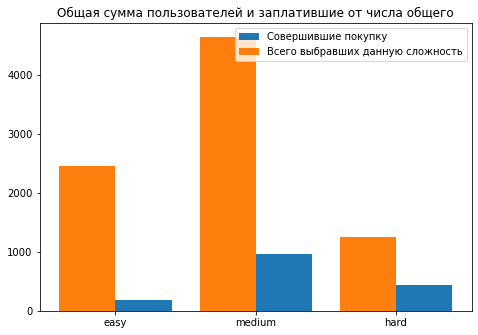

In [336]:
#z = ['7.72%','20.86%','35.39%']
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x = tips_per_day_df['Сложность'], height = tips_per_day_df['Купившие'], 
         width = 0.4, align = 'edge', label = 'Совершившие покупку')
axes.bar(x = tips_per_day['Сложность'], height = tips_per_day_df['Все'], 
         width = -0.4, align = 'edge', label = 'Всего выбравших данную сложность')
axes.legend(loc = 1)
axes.set_title('Общая сумма пользователей и заплатившие от числа общего')